<a href="https://colab.research.google.com/github/kopeckylukas/LSHTM_RCS/blob/main/R/Kanyakorn_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install pystan==2.19.1.1
!pip uninstall fbprophet
!pip install cmdstanpy==0.9.68
!pip install prophet

Found existing installation: fbprophet 0.7.1
Uninstalling fbprophet-0.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/fbprophet-0.7.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/fbprophet/*
Proceed (y/n)? y
  Successfully uninstalled fbprophet-0.7.1


In [21]:
import pandas as pd
import sklearn as sk
from prophet import Prophet

In [5]:
df = pd.read_csv('/content/CWT/provider_level_data.csv')
df.head()
df.rename({'period': 'ds', 'performance': 'y'}, axis=1, inplace=True)
df['y'] = round(df['y']*100, 2)
df = df[df.cancer_type == "ALL CANCERS"]
df = df.drop(["cancer_type", "provider_name", "provider_code"], axis=1)
df['ds']= pd.to_datetime(df['ds'])
df = df[(df.ds >= '2016-1-1') & (df.ds < '2020-3-1')]

In [7]:
df['region_name'].fillna("Unknown", inplace = True)
df['region_name'] = pd.Categorical(df['region_name'],
                                   categories=["Unknown",
                                               "LONDON COMMISSIONING REGION",
                                               "MIDLANDS AND EAST OF ENGLAND COMMISSIONING REGION",
                                               "NORTH OF ENGLAND COMMISSIONING REGION",
                                               "SOUTH OF ENGLAND COMMISSIONING REGION"],ordered=True)
df['standard'] = pd.Categorical(df['standard'],
                                categories=["28 Days FDS",
                                            "28 Days FDS (By Route)",
                                            "2WW",
                                            "2WW Breast",
                                            "31 Days",
                                            "31 Days Sub (Drugs)",
                                            "31 Days Sub (Radio)",
                                            "31 Days Sub (Surgery)",
                                            "62 Days",
                                            "62 Days (Consultant)",
                                            "62 Days (Screening)",
                                            "62 Days (Upgrade)",],ordered=True)

In [75]:
df.head()
df.tail()

,ds,region_name,standard,total_treated,within_standard,breaches,y
570524,2020-03-01,MIDLANDS AND EAST OF ENGLAND COMMISSIONING REGION,62 Days (Screening),4.0,3.0,1.0,75.00
570525,2020-03-01,LONDON COMMISSIONING REGION,62 Days (Screening),15.0,15.0,0.0,100.00
570526,2020-03-01,LONDON COMMISSIONING REGION,62 Days (Screening),23.0,15.5,7.5,67.39
570527,2020-03-01,SOUTH OF ENGLAND COMMISSIONING REGION,62 Days (Screening),21.5,18.0,3.5,83.72
570528,2020-03-01,SOUTH OF ENGLAND COMMISSIONING REGION,62 Days (Screening),8.0,5.0,3.0,62.50


In [25]:
df.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105970 entries, 3324 to 560400
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ds               105970 non-null  datetime64[ns]
 1   region_name      105970 non-null  category      
 2   standard         105970 non-null  category      
 3   total_treated    105970 non-null  float64       
 4   within_standard  105970 non-null  float64       
 5   breaches         105970 non-null  float64       
 6   y                105970 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(4)
memory usage: 5.1 MB


In [40]:
df_un = df[df.region_name == "Unknown"]
df_lon = df[df.region_name == "LONDON COMMISSIONING REGION"]
df_mid = df[df.region_name == "MIDLANDS AND EAST OF ENGLAND COMMISSIONING REGION"]
df_nor = df[df.region_name == "NORTH OF ENGLAND COMMISSIONING REGION"]
df_sou = df[df.region_name == "SOUTH OF ENGLAND COMMISSIONING REGION"]

In [9]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods= 36 , freq='M')
future.tail()


,ds
81,2022-09-30
82,2022-10-31
83,2022-11-30
84,2022-12-31
85,2023-01-31


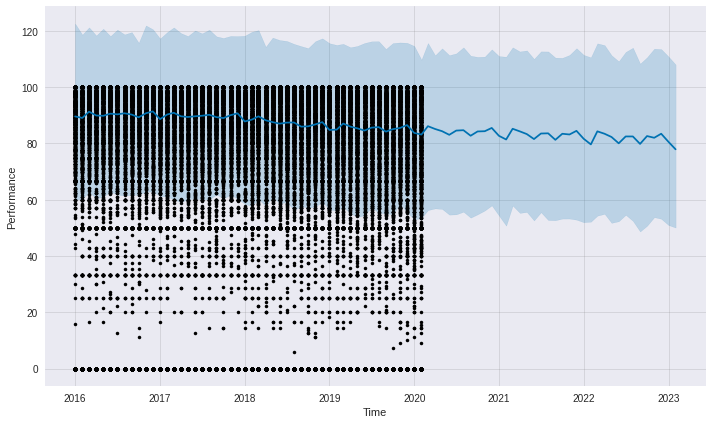

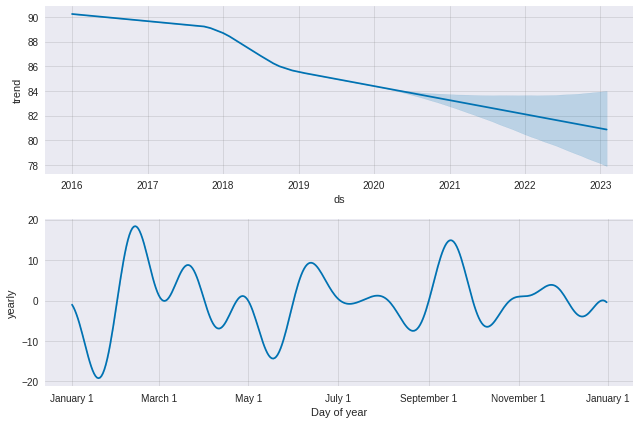

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#Across UK

forecast_m = m.predict(future)
plot_m = m.plot(forecast_m,xlabel='Time',
       ylabel='Performance')
com_m = m.plot_components(forecast_m)

plot_m.savefig('Across UK Scatter Plot', bbox_inches = 'tight')
com_m.savefig('Across UK Component Plot', bbox_inches = 'tight')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


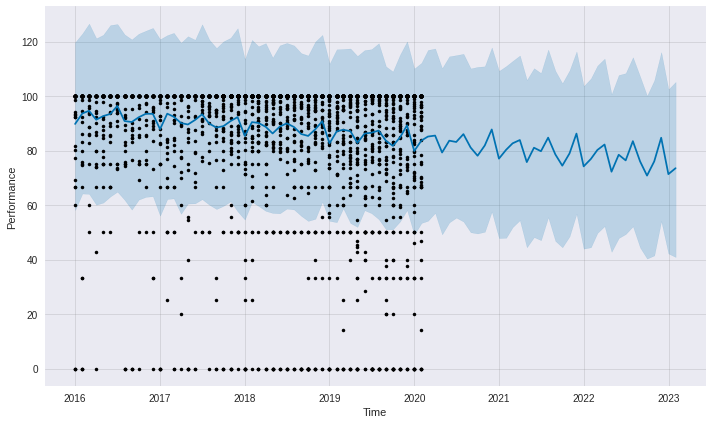

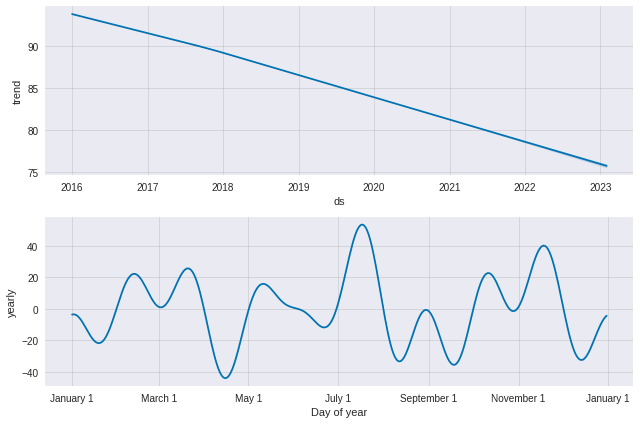

In [46]:
#region_name: Unknown area
m_un = Prophet()
m_un.fit(df_un)
future_un = m_un.make_future_dataframe(periods= 36 , freq='M')

forecast_m_un = m_un.predict(future_un)
plot_un = m_un.plot(forecast_m_un, xlabel='Time', ylabel='Performance', plot_cap = True)
com_un = m_un.plot_components(forecast_m_un)

plot_un.savefig('Unknown Scatter Plot', bbox_inches = 'tight')
com_un.savefig('Unknown Component Plot', bbox_inches = 'tight')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


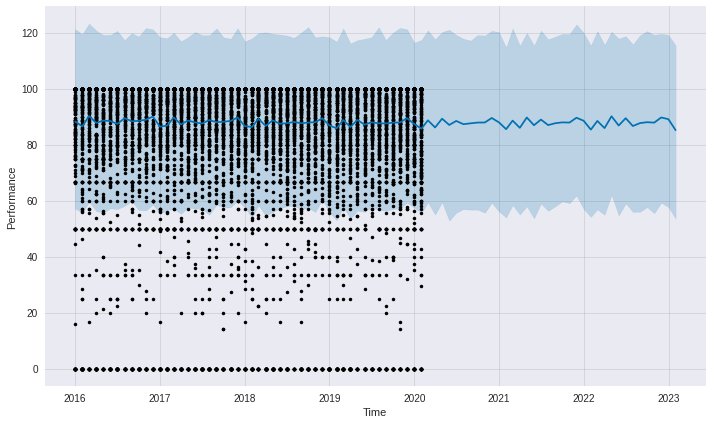

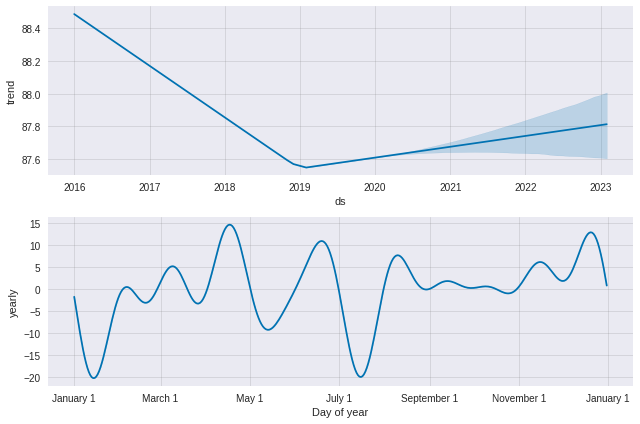

In [48]:
#region_name: LONDON COMMISSIONING REGION
m_lon = Prophet()
m_lon.fit(df_lon)
future_lon = m_lon.make_future_dataframe(periods= 36 , freq='M')

forecast_m_lon = m_lon.predict(future_lon)
plot_lon = m_lon.plot(forecast_m_lon,xlabel = 'Time', ylabel = 'Performance')
com_lon = m_lon.plot_components(forecast_m_lon)

plot_lon.savefig('London Scatter Plot', bbox_inches = 'tight')
com_lon.savefig('London Component Plot', bbox_inches = 'tight')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


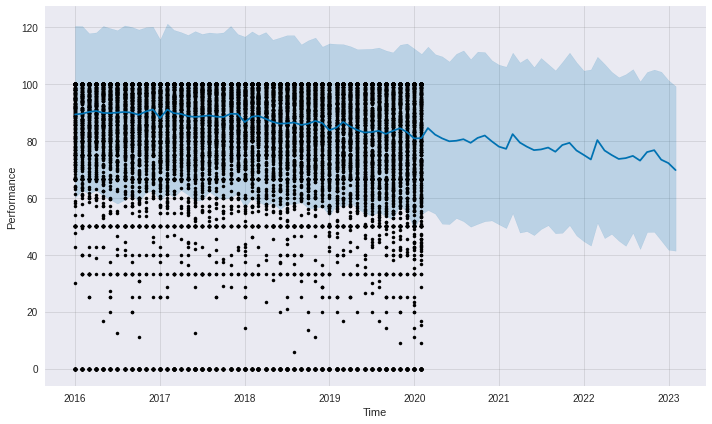

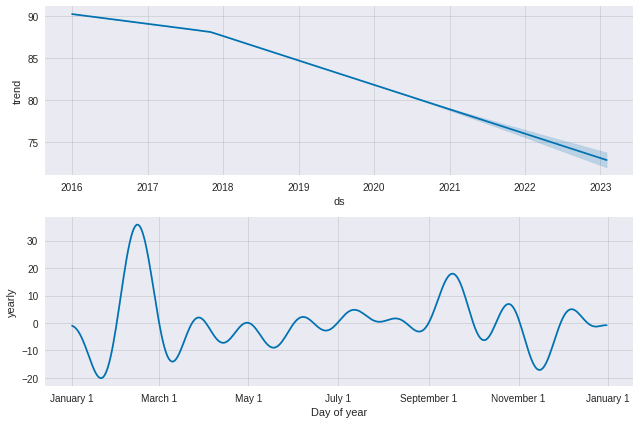

In [49]:
#region_name: MIDLANDS AND EAST OF ENGLAND COMMISSIONING REGION
m_mid = Prophet()
m_mid.fit(df_mid)
future_mid = m_mid.make_future_dataframe(periods= 36 , freq='M')

forecast_m_mid = m_mid.predict(future_mid)
plot_mid = m_mid.plot(forecast_m_mid, xlabel = 'Time', ylabel = 'Performance')
com_mid = m_mid.plot_components(forecast_m_mid)

plot_mid.savefig('Midlands Scatter Plot', bbox_inches = 'tight')
com_mid.savefig('Midlands Component Plot', bbox_inches = 'tight')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


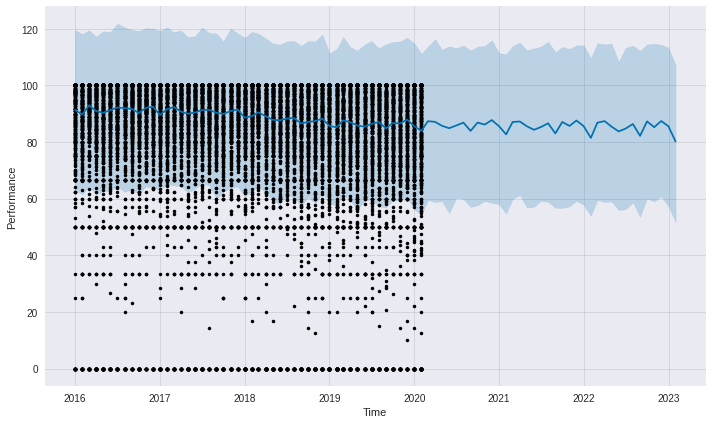

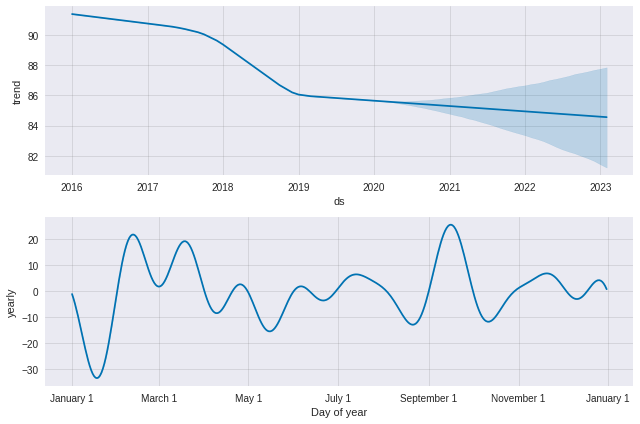

In [52]:
#region_name: NORTH OF ENGLAND COMMISSIONING REGION
m_nor = Prophet()
m_nor.fit(df_nor)
future_nor = m_nor.make_future_dataframe(periods= 36 , freq='M')

forecast_m_nor = m_nor.predict(future_nor)
plot_nor = m_nor.plot(forecast_m_nor, xlabel = 'Time', ylabel = 'Performance')
com_nor = m_nor.plot_components(forecast_m_nor)

plot_nor.savefig('North UK Scatter Plot', bbox_inches = 'tight')
com_nor.savefig('North UK Component Plot', bbox_inches = 'tight')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


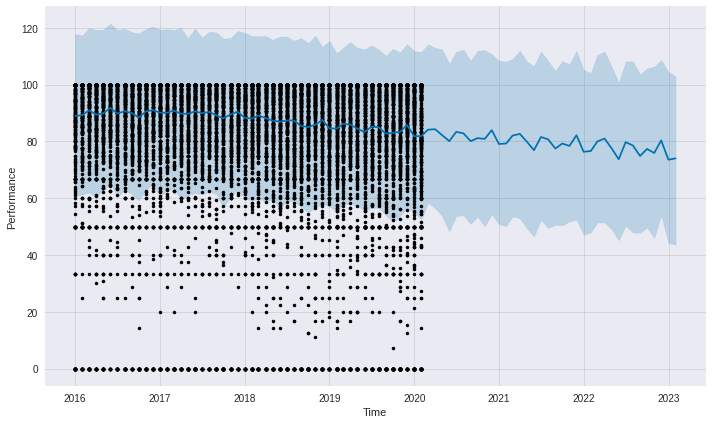

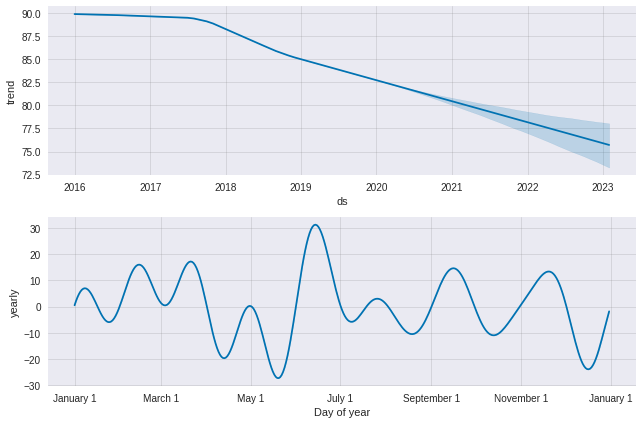

In [53]:
#region_name: SOUTH OF ENGLAND COMMISSIONING REGION
m_sou = Prophet()
m_sou.fit(df_sou)
future_sou = m_sou.make_future_dataframe(periods= 36 , freq='M')

forecast_m_sou = m_sou.predict(future_sou)
plot_sou = m_sou.plot(forecast_m_sou,xlabel = 'Time', ylabel = 'Performance')
com_sou = m_sou.plot_components(forecast_m_sou)

plot_sou.savefig('South UK Scatter Plot', bbox_inches = 'tight')
com_sou.savefig('South UK Component Plot', bbox_inches = 'tight')

In [20]:
#Create interactive graph
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_m)
#Too much data my computer can not handle it :(